# HackerSprint 

### Problem Statement :
**Commodity Price Forecasting using AI/ML.INFO:- Commodity price forecasting: use multivariate techniques to forecastfuture prices of steel, oil, etc using economic parameters. Any onecommodity considered is fine too.**


**DataSet : www.macrotrends.ne 2021's Crude Oil Production and Export**


* **Read The Read me file**

Collabrator :
* Ujwal Nikam 
* Rushikesh Adhav
* Kartik Patil
* Mayur Patil

In [1]:

# Basic Importing 

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

In [3]:
data = pd.read_csv("crudeoil.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-03-22,27.65,28.250000,27.250000,27.459999,27.459999,92302.0
1,2000-03-23,27.65,27.780001,27.160000,27.309999,27.309999,79373.0
2,2000-03-24,27.85,28.150000,27.549999,27.980000,27.980000,55693.0
3,2000-03-26,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-03-27,27.65,28.020000,27.410000,27.730000,27.730000,59199.0


In [4]:
# Inorder to Know the form of data 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6244 entries, 0 to 6243
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6244 non-null   object 
 1   Open       5099 non-null   float64
 2   High       5099 non-null   float64
 3   Low        5099 non-null   float64
 4   Close      5099 non-null   float64
 5   Adj Close  5099 non-null   float64
 6   Volume     5099 non-null   float64
dtypes: float64(6), object(1)
memory usage: 341.6+ KB


In [5]:
# Mean and Standerd deviation 
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5.099000e+03
mean,61.420967,62.331418,60.443248,61.424156,61.424156,2.151295e+06
std,26.177958,26.410581,25.923062,26.174414,26.174414,2.355769e+07
min,1.400000,13.850000,-39.439999,-2.720000,-2.720000,0.000000e+00
25%,40.230000,40.975001,39.410000,40.185000,40.185000,1.025160e+05
50%,58.310001,59.040001,57.360001,58.139999,58.139999,2.459150e+05
75%,81.785000,82.860000,80.524998,81.769997,81.769997,3.917165e+05
max,145.190002,147.270004,142.490005,145.179993,145.179993,4.599355e+08


In [6]:
# Total Null values
data.isnull().sum()

Date            0
Open         1145
High         1145
Low          1145
Close        1145
Adj Close    1145
Volume       1145
dtype: int64

### From The Above observation We conclude that for the large sum of Missing data
* So We can't Fill the average Values as Deviation is too high and it will lead to wong model
* We cannot Keep the values Empty as it will Outlay the Prediction pattern 
* The best idea is to Drop the missing value as each value denotes is corrs to a Date And Continue with the rest data

In [7]:
data_missing = data.dropna()

data_missing.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# The New DataSet Is Data Missing 
data_missing.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-03-22,27.65,28.250000,27.250000,27.459999,27.459999,92302.0
1,2000-03-23,27.65,27.780001,27.160000,27.309999,27.309999,79373.0
2,2000-03-24,27.85,28.150000,27.549999,27.980000,27.980000,55693.0
4,2000-03-27,27.65,28.020000,27.410000,27.730000,27.730000,59199.0
5,2000-03-28,27.60,27.870001,27.000000,27.080000,27.080000,39487.0


# Visualization 

**"Data will Talk with
You if you are
willing to Listine"**

* After cleaning the data we have to Viualize the data
* It helps us to find the Patterns And Prominant Features
* Observation : Closing Price highly depends on opening Price and Day-High  And leaase on Volume -units

C:\Users\Admin\AppData\Local\Temp/ipykernel_9908/1794345643.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


Text(0.5, 0.98, 'Correlation matrix of features')

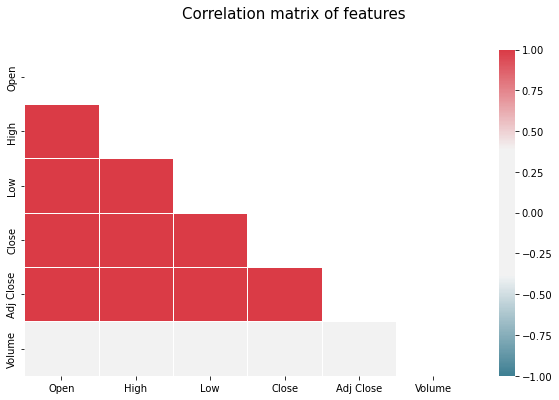

In [9]:


#In order to predict the Relations And How strong the relation is we use Correelation Metrix  

corr = data_missing.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)

<Figure size 1152x432 with 0 Axes>

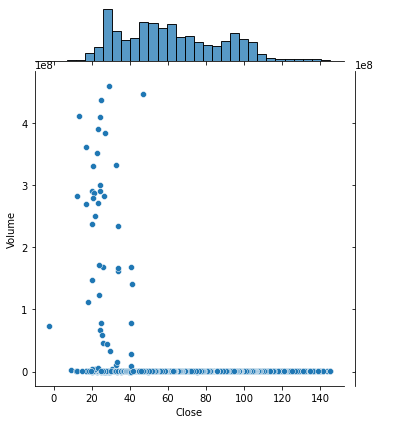

In [10]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(6)
sns.jointplot(x=data_missing['Close'],y =data_missing['Volume'], data = data_missing)

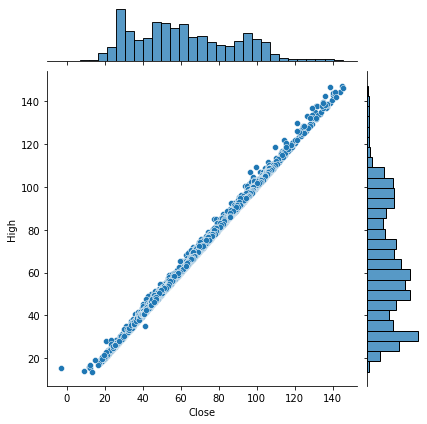

In [11]:
sns.jointplot(x=data_missing['Close'],y =data_missing['High'], data = data_missing)

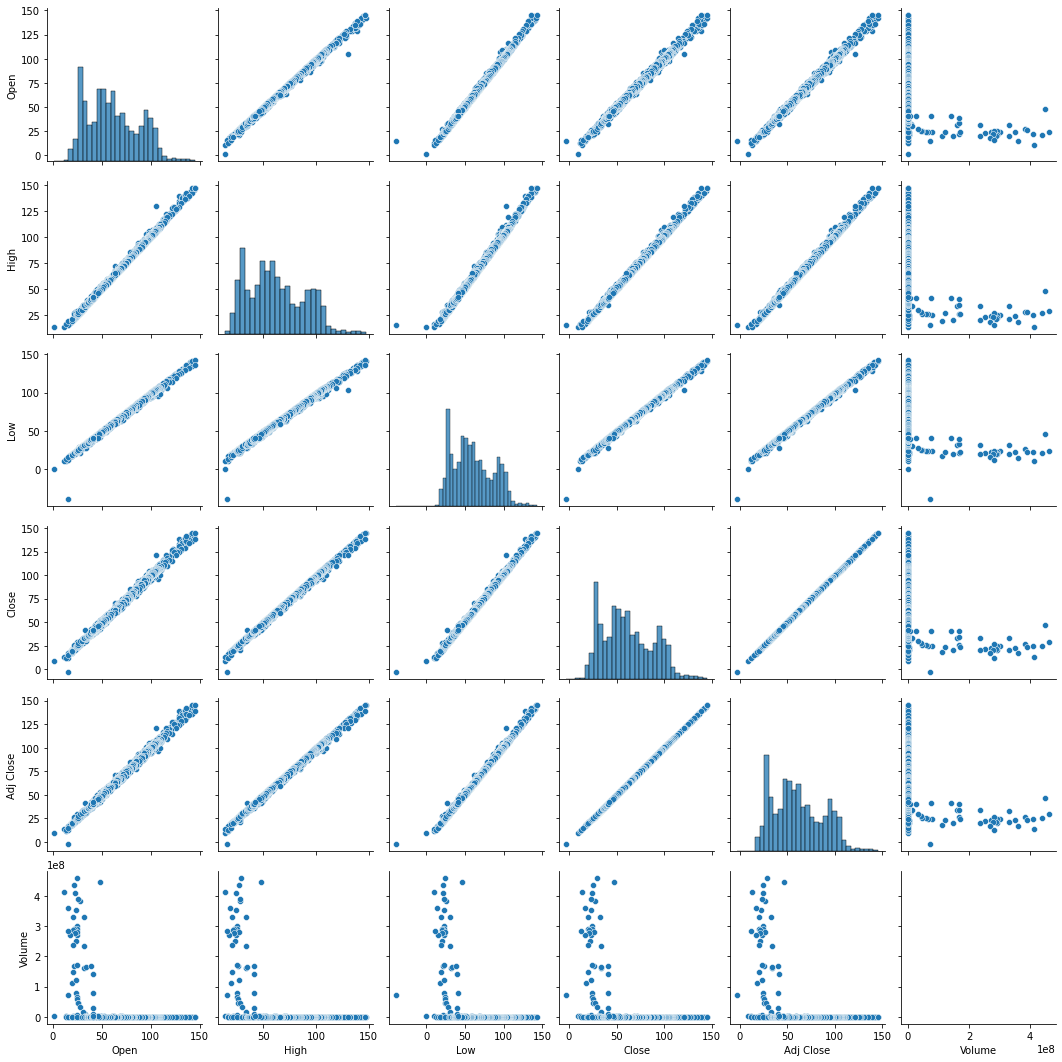

In [12]:
sns.pairplot(data_missing)

<AxesSubplot:>

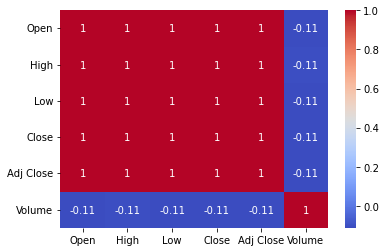

In [13]:
corr = data_missing.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

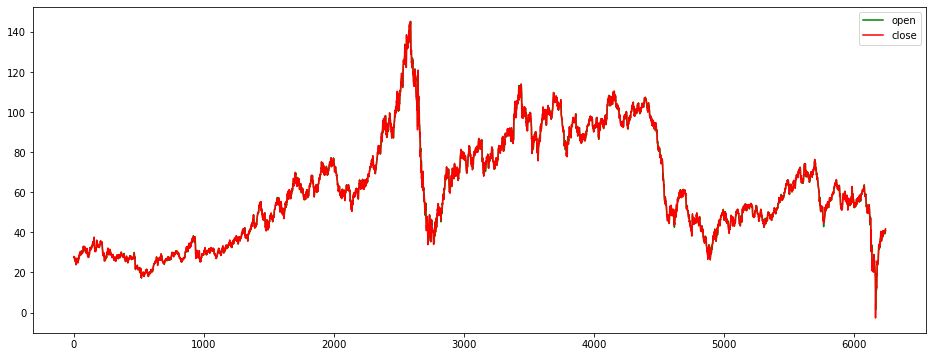

In [14]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(6)
plt.plot(data_missing['Open'],c='green',label='open')
plt.plot(data_missing['Close'],c='red',label='close')
plt.legend()

<AxesSubplot:xlabel='Date'>

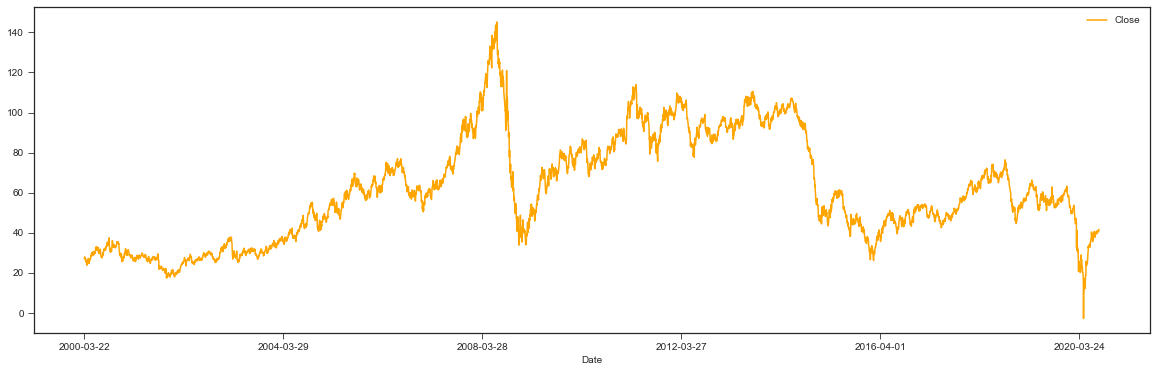

In [15]:
 plt.style.use('seaborn-ticks')

data_missing.plot(x= "Date",y= "Close",figsize = (20,6),color= "orange")

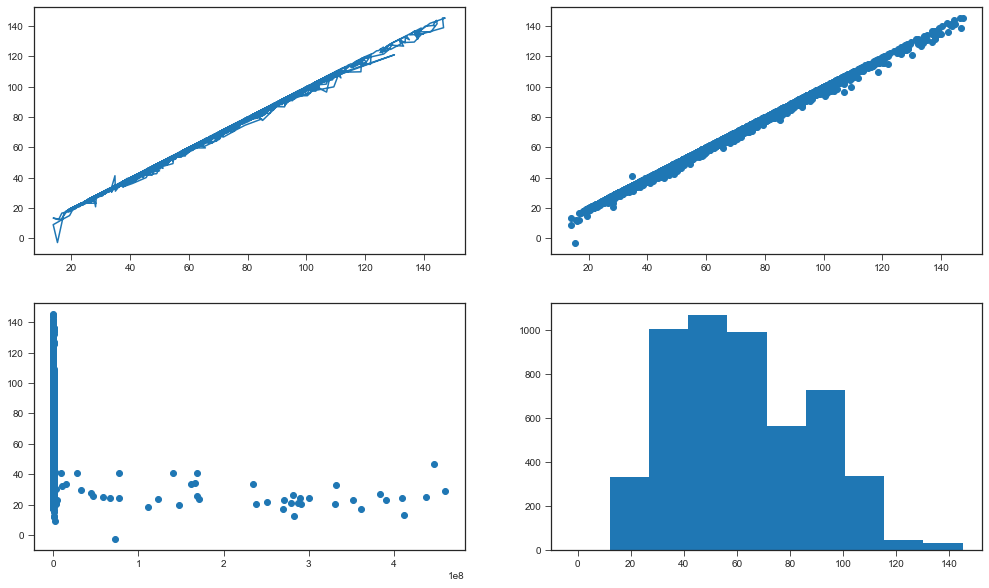

In [16]:
# subplots 

fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2,            # fig, ax = rest same
                                          ncols=2,
                                          figsize = (17,10))

#plotting eaxh plot

ax1.plot(data_missing['High'],data_missing['Close'],label='regr line');                          # ax[0,0].plot(x1,np.exp(x1)); 
ax2.scatter(data_missing['High'],data_missing['Close']);                         # ax[1,0].scatter(x,np.exp(x));
ax3.scatter(data_missing['Volume'],data_missing['Close']);                         # ax[1,0].scatter(x,np.exp(x));
ax4.hist(data_missing["Close"]); 

**Multiple Regression to Predict future closing price of oil**

In [17]:
X = data_missing[['High','Low','Open','Volume']].values
y = data_missing['Close'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [19]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [20]:
print(regressor.coef_)

[ 8.58915265e-01  5.64413521e-01 -4.25898034e-01  9.42241840e-11]


In [21]:
print(regressor.intercept_)

-0.06062551878374478


In [22]:
predicted = regressor.predict(X_test)

In [23]:
dataregr = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})

In [24]:
dataregr.head()

,Actual,Predicted
0,45.410000,46.347797
1,65.970001,65.548290
2,48.529999,48.229109
3,27.080000,27.361727
4,103.220001,102.682478


In [25]:
graph = dataregr.head(10)

<AxesSubplot:>

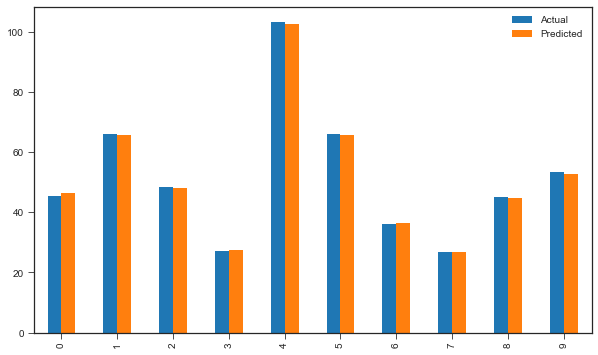

In [26]:
graph.plot(kind='bar',figsize=(10,6))

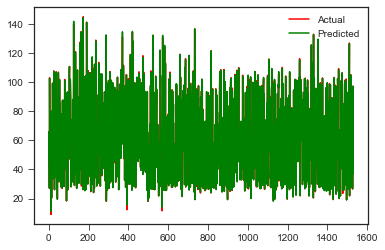

In [27]:


plt.plot(dataregr['Actual'],c='red',label='Actual')
plt.plot(dataregr['Predicted'],c='green',label='Predicted')
plt.legend()

In [28]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Mean Absolute Error: 0.4155879469103396
Mean Squared Error: 0.3458610496888223
Root Mean Squared Error: 0.58809952362574


In [29]:
################## R square value is 0.9999 before implement of PCA ################

regressor.score(X_test,y_test)

0.9994952697166385

In [30]:
#Data Standardisation
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit(X)
X_std = X_scaled.transform(X)

In [31]:
X_std

array([[-1.29057217, -1.280578  , -1.29018004, -0.0874107 ],
       [-1.30836978, -1.28405015, -1.29018004, -0.08795958],
       [-1.2943589 , -1.2690042 , -1.28253927, -0.08896487],
       ...,
       [-0.82101725, -0.7709432 , -0.79391242, -0.09103077],
       [-0.81117182, -0.79524815, -0.80460941,  0.28001778],
       [-0.75474943, -0.75628296, -0.78627161, -0.03512686]])

In [32]:
X_std.shape

(5099, 4)

In [33]:
cov_mat = np.cov(X_std.T)
print('NumPy covariance matrix: \n%s' %cov_mat)

NumPy covariance matrix: 
[[ 1.00019616  0.99886751  0.99957543 -0.10648224]
 [ 0.99886751  1.00019616  0.99911225 -0.11278871]
 [ 0.99957543  0.99911225  1.00019616 -0.10954984]
 [-0.10648224 -0.11278871 -0.10954984  1.00019616]]


In [34]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.5747246  -0.0572969  -0.62989096 -0.51927457]
 [-0.57483237 -0.05087116 -0.13490379  0.80546933]
 [-0.5748666  -0.05419866  0.76487652 -0.28557802]
 [ 0.0937431  -0.99558611  0.00150487  0.00427448]]

Eigenvalues 
[3.01644164e+00 9.82341095e-01 5.93748520e-04 1.40814117e-03]


In [35]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.016441636460063
0.9823410952664696
0.001408141173439747
0.0005937485201892075


In [36]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

Text(0, 0.5, 'Cumulative explained variance')

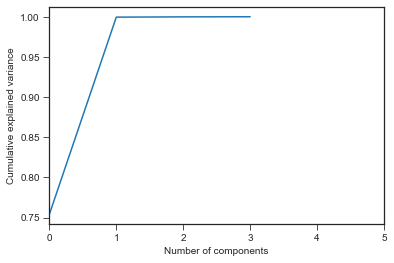

In [37]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,5,10)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [38]:
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale 
from sklearn.metrics import mean_squared_error

In [39]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(scale(X))

In [40]:
regr = LinearRegression()
#np.random.seed(45)

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [42]:
#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

C:\Users\Admin\OneDrive\Desktop\samplePrj\prj1\env\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [43]:
#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

LinearRegression()

In [44]:
#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

1.7478355949311726

In [45]:
################## R square value is 0.9725 after implement of PCA #################

regr.score(X_reduced_train[:,:1], y_train)

0.9961762777033679

# New Data 

As from the Above Vizualization we clearely see that the the correlation is too high and the values are 
too close that finding difference and correct patterns.

### Solution :

* Principal Component Anylisis 
* Mean - Root Method 
* component Sepration  


We find Mean -  Root Method Musch Flexible  As we have to keep the Project simple And PCA is already Implimented 
For This We  Actully Find The Mean Of Dominant Factors then Subtracted thyem form original

`openData_mean = data_missing["Open"].mean()` 

And Squared 

`data_missing["new_open"] = (data_missing["Open"]- openData_mean)**2`

In [46]:


# Mean Of the Values

openData_mean = data_missing["Open"].mean()
HighData_mean =data_missing["High"].mean()
LowData_mean =data_missing["Low"].mean()

In [47]:
# Squaring all the undisinctible Parameters in order to increase Variance and Distinctbility


data_missing["new_open"] = (data_missing["Open"]- openData_mean)**2
data_missing["new_High"] = (data_missing["High"]- openData_mean)**2
data_missing["new_Low"] = (data_missing["Low"]- openData_mean)**2


C:\Users\Admin\AppData\Local\Temp/ipykernel_9908/4068616849.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing["new_open"] = (data_missing["Open"]- openData_mean)**2
C:\Users\Admin\AppData\Local\Temp/ipykernel_9908/4068616849.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_missing["new_High"] = (data_missing["High"]- openData_mean)**2
C:\Users\Admin\AppData\Local\Temp/ipykernel_9908/4068616849.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [48]:
data_missing.head()

,Date,Open,High,Low,Close,Adj Close,Volume,new_open,new_High,new_Low
0,2000-03-22,27.65,28.250000,27.250000,27.459999,27.459999,92302.0,1140.478200,1100.313040,1167.654974
1,2000-03-23,27.65,27.780001,27.160000,27.309999,27.309999,79373.0,1140.478200,1131.714581,1173.813848
2,2000-03-24,27.85,28.150000,27.549999,27.980000,27.980000,55693.0,1127.009813,1106.957233,1147.242461
4,2000-03-27,27.65,28.020000,27.410000,27.730000,27.730000,59199.0,1140.478200,1115.624585,1156.745864
5,2000-03-28,27.60,27.870001,27.000000,27.080000,27.080000,39487.0,1143.857797,1125.667308,1184.802957


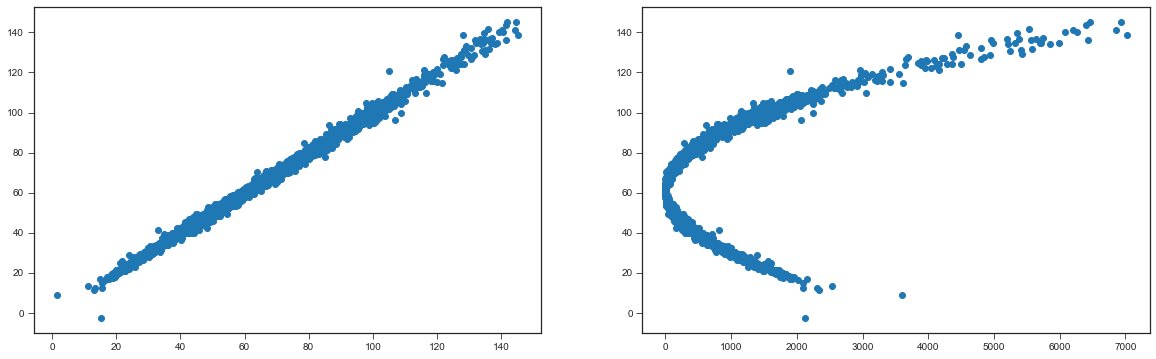

In [49]:
# Comapring The Overfit model and Current model

fig , (ax1,ax2) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(20,6)
                               
                                  )

ax1.scatter(data_missing["Open"],data_missing["Close"])
ax2.scatter(data_missing["new_open"],data_missing["Close"])
# ax.scatter(data_missing["new_open"],data_missing["Close"])

<AxesSubplot:>

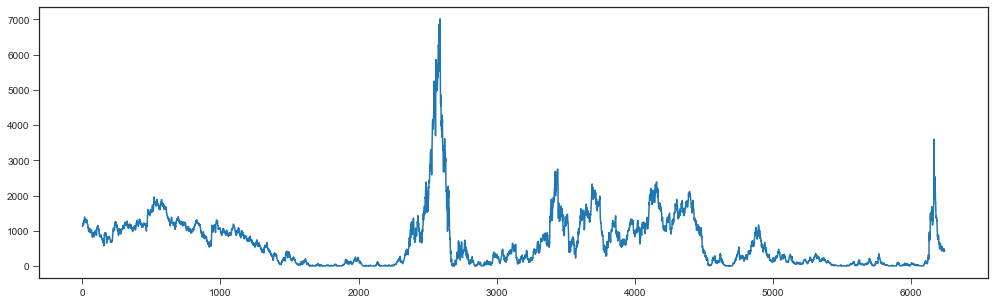

In [50]:
data_missing["new_open"].plot(figsize = (17,5))

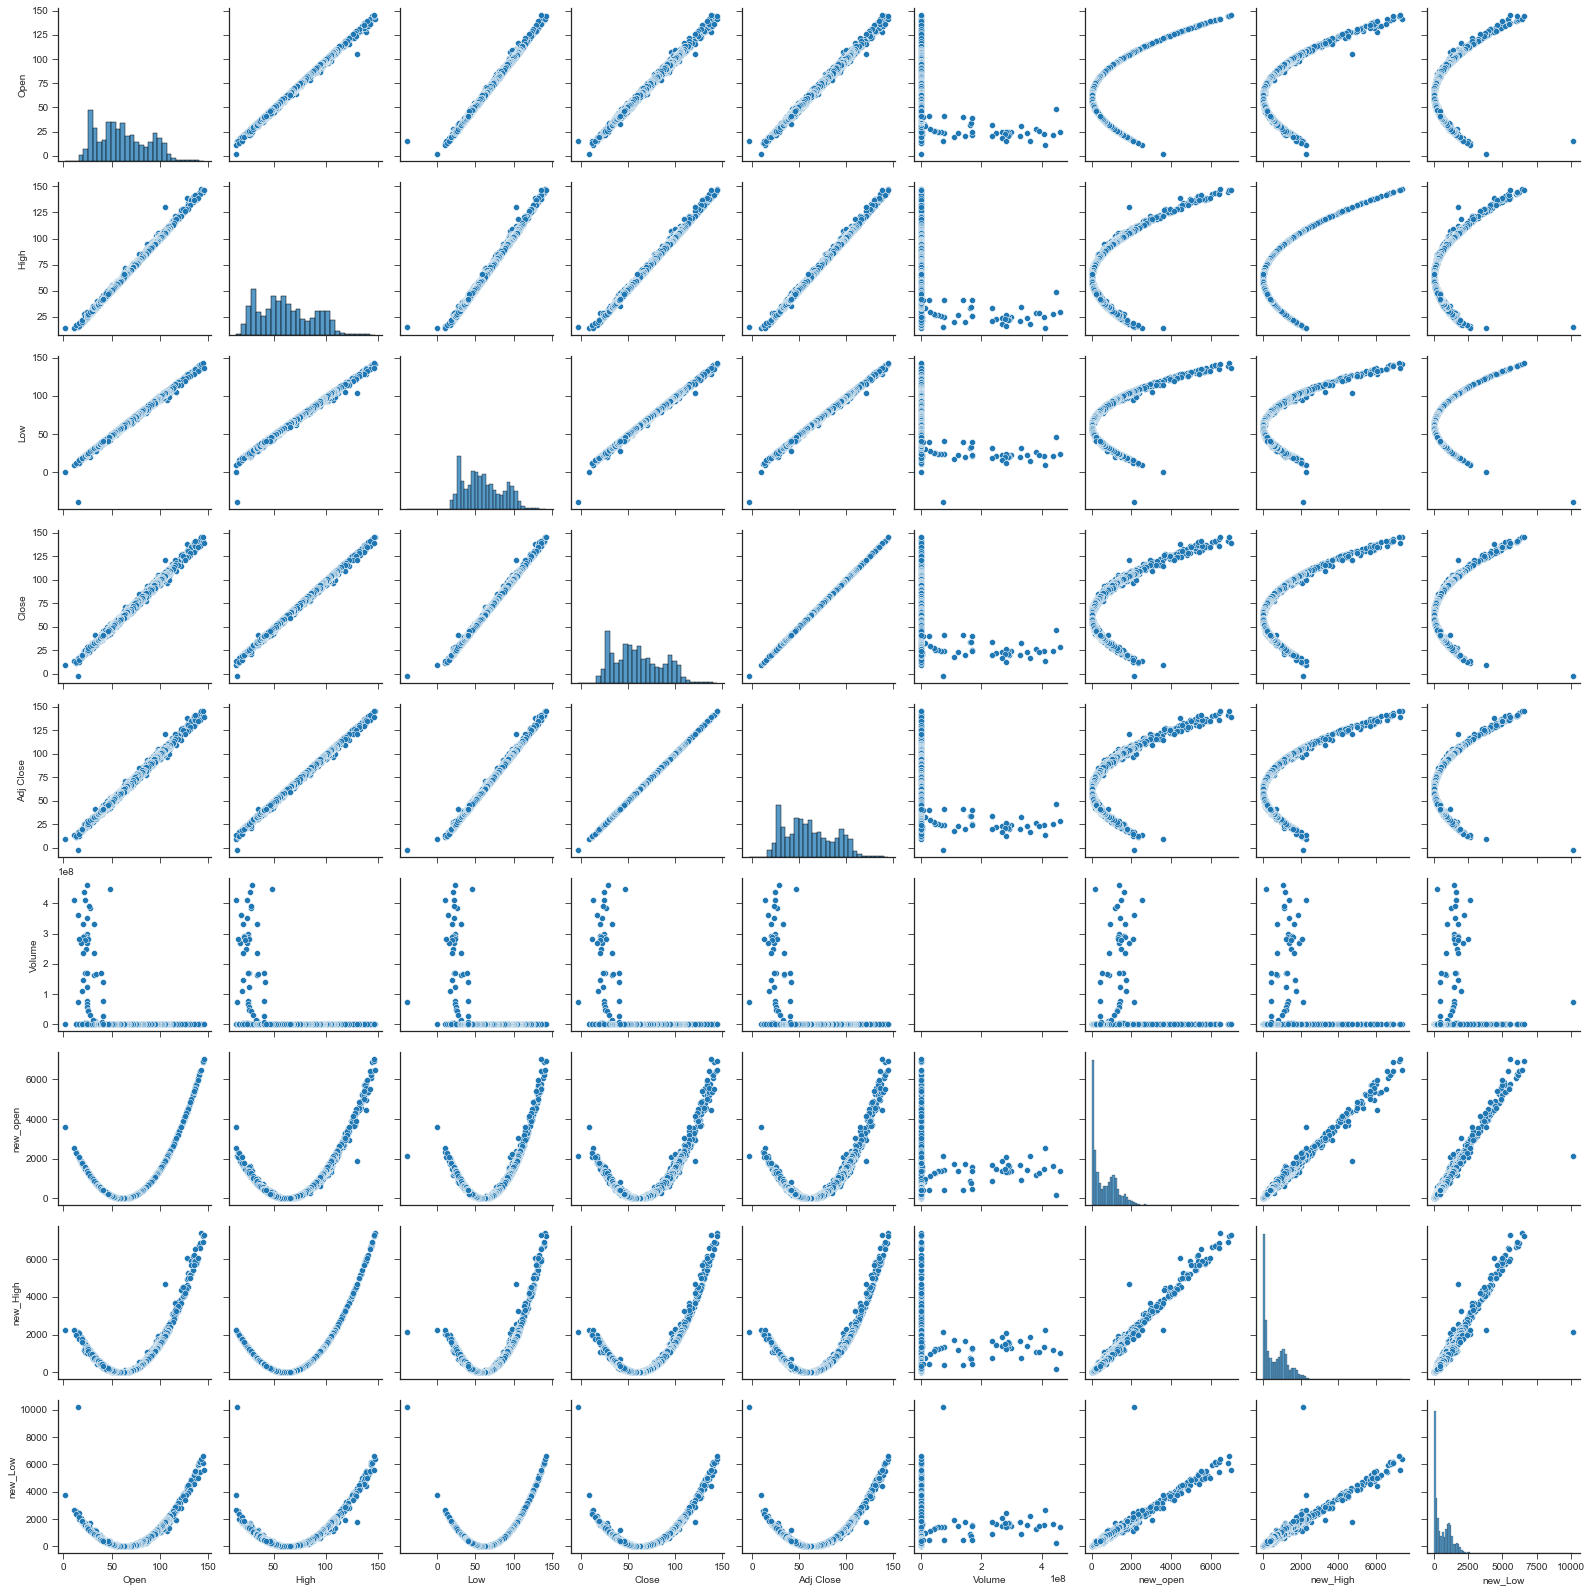

In [66]:
sns.pairplot(data_missing)

In [51]:
X = data_missing.drop(["Close","Open","Date","Adj Close","High","Low"],axis=1)
y  = data_missing["Close"]
X.head()

,Volume,new_open,new_High,new_Low
0,92302.0,1140.478200,1100.313040,1167.654974
1,79373.0,1140.478200,1131.714581,1173.813848
2,55693.0,1127.009813,1106.957233,1147.242461
4,59199.0,1140.478200,1115.624585,1156.745864
5,39487.0,1143.857797,1125.667308,1184.802957


**Random Forest Method**

In [61]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor



# splliting the data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

rf = RandomForestRegressor()
rf.fit (X_train,y_train)

# Evaluate the random 

rf.score(X_test,y_test)
print(f"The Overfitting Problem is resolved By the new model with acurrecy : ",rf.score(X_test,y_test))

The Overfitting Problem is resolved By the new model with acurrecy :  0.9304974795593148


### Regid Regressor

In [65]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train,y_train)
reg.score(X_test,y_test),reg.intercept_

(0.530470942211303, 57.469151020092866)

### LSTM and Deep Learning Concept 

In [68]:
# droping the date feature...
dataset = data_missing.drop(["Date","Open","High","Low","Adj Close"], axis=1)
dataset

,Close,Volume,new_open,new_High,new_Low
0,27.459999,92302.0,1140.478200,1100.313040,1167.654974
1,27.309999,79373.0,1140.478200,1131.714581,1173.813848
2,27.980000,55693.0,1127.009813,1106.957233,1147.242461
4,27.730000,59199.0,1140.478200,1115.624585,1156.745864
5,27.080000,39487.0,1143.857797,1125.667308,1184.802957
...,...,...,...,...,...
6239,40.759998,77425275.0,421.109997,411.317656,436.850414
6240,40.570000,28236139.0,427.702306,421.109997,458.001381
6241,40.630001,7030.0,431.848624,431.432980,439.362172
6242,40.650002,8747221.0,443.564281,420.699760,466.169762


In [69]:
# Outlier detection
up_b = dataset["Close"].mean() + 2*dataset["Close"].std()
low_b = dataset["Close"].mean() - 2*dataset["Close"].std()

In [70]:
# Replace outliers by interpolarion for base consumption
dataset.loc[dataset["Close"] > up_b ,"Close"] = np.nan
dataset.loc[dataset["Close"] < low_b ,"Close"] = np.nan
dataset["Close"].interpolate(inplace = True)

In [71]:
# split dataset into train and test data...
train_size = int(len(dataset)*0.8)
train_dataset, test_dataset = dataset.iloc[:train_size], dataset.iloc[train_size:]

Dimension of train data : (4079, 5)
Dimension of test data : (1020, 5)


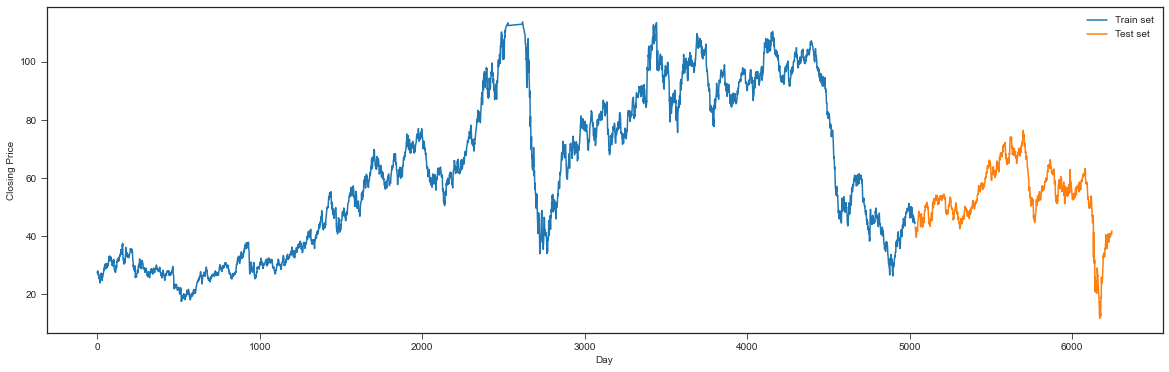

In [79]:
# Plot train and test data

plt.figure(figsize=(20,6));
plt.plot(train_dataset.Close)
plt.plot(test_dataset.Close);
plt.xlabel("Day");
plt.ylabel("Closing Price")
plt.legend(['Train set' , 'Test set'], loc = 'upper right');

print("Dimension of train data :", train_dataset.shape);
print("Dimension of test data :", test_dataset.shape);

In [80]:
# Split the target variable and dependent variables..

# Split train data into x and y

x_train = train_dataset.drop('Close',axis=1)
y_train = train_dataset.loc[:,["Close"]]

In [81]:
# Split test data to x and y

x_test = test_dataset.drop("Close", axis=1)
y_test = test_dataset.loc[:,["Close"]]

In [82]:
x_train.shape,x_test.shape

((4079, 4), (1020, 4))

In [83]:
y_train.shape,y_test.shape

((4079, 1), (1020, 1))

In [84]:
# Data Transformation...
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [85]:
# Different scaler for input and output

scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

In [86]:
# Fit the Scaler using available training data...

input_scaler = scaler_x.fit(x_train)
output_scaler = scaler_y.fit(y_train)

In [87]:
# Apply the scaler using available training data

train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(x_train)

In [88]:
# Apply the scaler to test data

test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(x_test)

In [89]:
# Create a 3D input Dataset

def create_dataset (x,y,time_steps = 1):
  xs,ys = [],[]
  for i in range(len(x) - time_steps):
    v = x[i:i+time_steps, :]
    xs.append(v)
    ys.append(y[i+time_steps])
  return np.array(xs), np.array(ys)

TIME_STEPS = 30

X_test, Y_test = create_dataset(test_x_norm, test_y_norm, TIME_STEPS)
X_train, Y_train = create_dataset(train_x_norm, train_y_norm, TIME_STEPS)

print('X_train.shape: ', X_test.shape)
print('Y_train.shape: ', Y_train.shape)
print('X_test.shape: ', X_test.shape)
print('Y_test.shape: ', Y_train.shape)

X_train.shape:  (990, 30, 4)
Y_train.shape:  (4049, 1)
X_test.shape:  (990, 30, 4)
Y_test.shape:  (4049, 1)
